In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import xlrd
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import sys

In [2]:
loc = (r"C:\Users\Idan\Documents\Data Analyst\דאטה סיינס\Statistics for Data Science - All Resources\24. Practical example. Descriptive statistics_exercise.xlsx")
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0) 

# Preparinf the data set
for i in range(1,10):
    data = []
    for j in range(5,272):
        data.append(sheet.cell_value(j, i))
    if i == 1:
        product= pd.DataFrame(index = data)
    elif i <10:
        product[sheet.cell_value(4, i)] = data
for i in range(11,27):
    data = []
    for j in range(5,201):
        if len(sheet.cell_value(j, 11)) > 0:
            data.append(sheet.cell_value(j, i))
    if i == 11:
        customer = pd.DataFrame(index = data)
    else:
        customer[sheet.cell_value(4, i)] = data


In [170]:
product.head()
# Product's data set

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
1030.0,1.0,2005,11,Apartment,30,743.0856,246172.6760,Sold
1029.0,1.0,2005,10,Apartment,29,756.2128,246331.9040,Sold
2002.0,2.0,2007,7,Apartment,2,587.2808,209280.9104,Sold
2031.0,2.0,2007,12,Apartment,31,1604.7464,452667.0064,Sold
1049.0,1.0,2004,11,Apartment,49,1375.4508,467083.3132,Sold


In [171]:
customer.head()
# Customer's data set

,Entity,Name,Surname,Age at time of purchase,Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
C0028,Individual,Madalyn,Mercer,19,18-25,1986,6,21,Female,USA,California,Home,5.0,No,Website
C0027,Individual,Lara,Carrillo,22,18-25,1983,2,24,Female,USA,California,Home,5.0,No,Website
C0112,Individual,Donavan,Flowers,22,18-25,1985,12,27,Male,USA,California,Home,1.0,Yes,Client
C0160,Individual,Darien,Dorsey,22,18-25,1985,12,27,Male,USA,California,Investment,3.0,Yes,Website
C0014,Individual,Alessandra,Perry,25,18-25,1979,5,15,Female,USA,California,Home,4.0,No,Agency


,Age Intervals
"(18.942, 28.5]",12
"(28.5, 38.0]",41
"(38.0, 47.5]",44
"(47.5, 57.0]",46
"(57.0, 66.5]",21
"(66.5, 76.0]",14


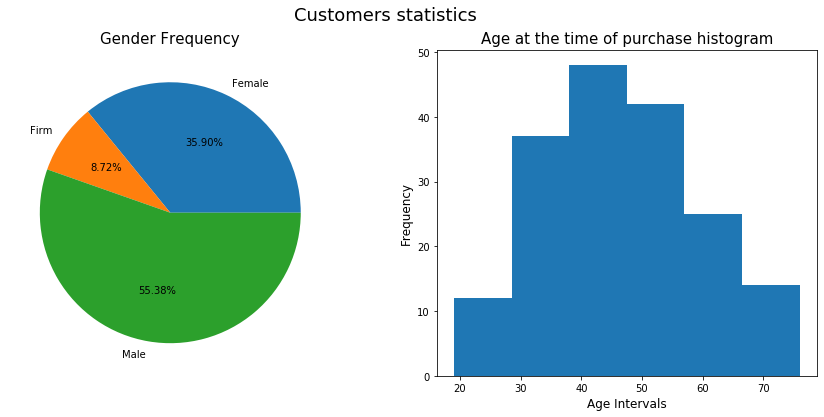

In [140]:
def autolabel(rects,ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

        
def label_plot(xs,ys,ax):
    for x,y in zip(xs,ys):
        label = "{:.2f}".format(y)
        ax.annotate(label+'%',
                    (x,y), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center',
                   fontsize=11) 

# Starting with the customers statistics, gender and age
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,6))
fig.suptitle('Customers statistics',fontsize=18)

customer.loc[(customer.Gender == 'N/A'),'Gender']='Firm'
customer.loc[(customer.Gender == 'M'),'Gender']='Male'
customer.loc[(customer.Gender == 'F'),'Gender']='Female'
grouped_gender = customer.groupby('Gender')['Name'].count()
ax1.pie(grouped_gender,labels = grouped_gender.index, autopct='%.2f%%')
ax1.set_title('Gender Frequency',fontsize=15)

customer.loc[customer['Age at time of purchase'] == 'N/A','Age at time of purchase'] = np.nan
age_freq = customer['Age at time of purchase'].value_counts(bins=6,sort=False)
customer_age=pd.DataFrame({'Age Intervals':age_freq})
ax2.hist(customer['Age at time of purchase'],bins=6)
ax2.set_title('Age at the time of purchase histogram',fontsize=15)
ax2.set_ylabel('Frequency',fontsize=12)
ax2.set_xlabel('Age Intervals',fontsize=12)
customer_age



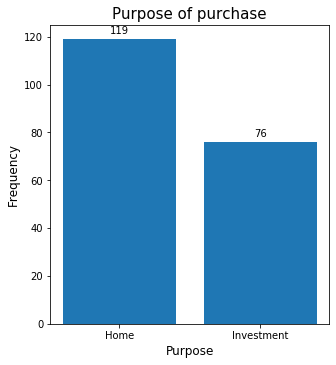

In [126]:
# Purposes of purchase
grouped_purpose = customer.groupby('Purpose')['Name'].count().sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(5,5.5))
plt.bar(grouped_purpose.index,grouped_purpose)
plt.title('Purpose of purchase',fontsize=15)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Purpose',fontsize=12)
rects=ax.patches
autolabel(rects,plt);

,Frequency,Relative Frequency,Comulative Frequency
USA,177,91.0,91.0
Canada,7,4.0,94.0
Russia,4,2.0,96.0
UK,2,1.0,97.0
Belgium,2,1.0,98.0
Mexico,1,1.0,99.0
Germany,1,1.0,99.0
Denmark,1,1.0,100.0


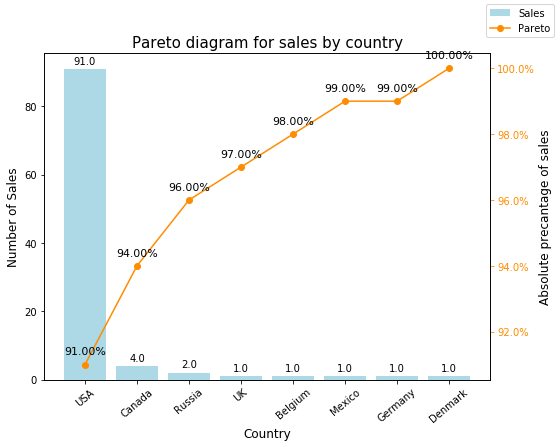

In [149]:
# Here I am trying to figure out from wich countries the customers are comming from
grouped_contries_n = customer['Country'].value_counts()
relative_frequency_countries = round(grouped_contries_n/grouped_contries_n.sum()*100)
comulative_Frequency_countries =  round(grouped_contries_n.cumsum()/grouped_contries_n.sum()*100)

    
countries_data = pd.DataFrame({'Frequency':grouped_contries_n,
                              'Relative Frequency':relative_frequency_countries,
                              'Comulative Frequency':comulative_Frequency_countries})

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(countries_data['Relative Frequency'].index,countries_data['Relative Frequency'],color = 'lightblue',label='Sales')
ax.set_title('Pareto diagram for sales by country',fontsize=15)
ax.set_xticklabels(countries_data['Relative Frequency'].index,rotation=40,fontsize=10)
ax.set_xlabel('Country',fontsize=12)
ax.set_ylabel('Number of Sales',fontsize=12)
rects1 = ax.patches
autolabel(rects1,ax)

ax2 = ax.twinx()
ax2.plot(comulative_Frequency,marker='o',color = 'darkorange',label='Pareto')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Absolute precantage of sales',fontsize=12)
ax2.tick_params(axis="y", colors="darkorange")
xs = np.arange(len(countries_data['Relative Frequency'].index))
label_plot(xs,comulative_Frequency_countries,ax2)
fig.legend()

countries_data

,Frequency,Relative Frequency,Comulative Frequency
California,119,61.0,61.0
Nevada,17,9.0,70.0
Out Of USA,14,7.0,77.0
Oregon,11,6.0,83.0
Arizona,11,6.0,88.0
Colorado,11,6.0,94.0
Utah,6,3.0,97.0
Virginia,4,2.0,99.0
Wyoming,1,1.0,99.0
Kansas,1,1.0,100.0


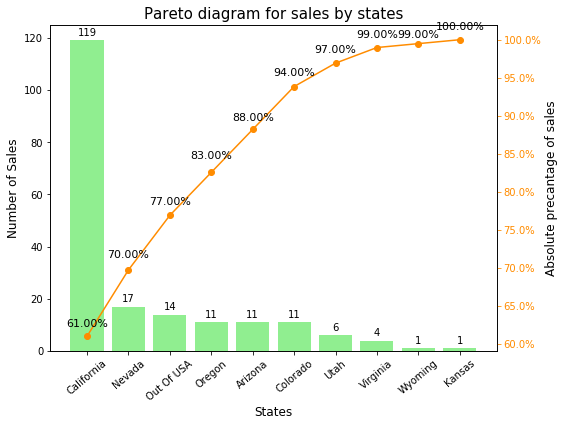

In [160]:
# After I saw the most of them (91%) are comming from the USA, now I want to figure out from wich state in US.
customer.loc[(customer.State == ''),'State']='Out Of USA'
grouped_states_n = customer['State'].value_counts()
relative_frequency_states = round(grouped_states_n/grouped_states_n.sum()*100)
comulative_Frequency_states =  round(grouped_states_n.cumsum()/grouped_states_n.sum()*100)

    
states_data = pd.DataFrame({'Frequency':grouped_states_n,
                              'Relative Frequency':relative_frequency_states,
                              'Comulative Frequency':comulative_Frequency_states})

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(states_data.index,grouped_states_n,color = 'lightgreen',label='Sales')
ax.set_title('Pareto diagram for sales by states',fontsize=15)
ax.set_xticklabels(states_data.index,rotation=40,fontsize=10)
ax.set_xlabel('States',fontsize=12)
ax.set_ylabel('Number of Sales',fontsize=12)
rects1 = ax.patches
autolabel(rects1,ax)

ax1 = ax.twinx()
ax1.plot(grouped_states_pareto,marker='o',color = 'darkorange',label='Pareto')
ax1.yaxis.set_major_formatter(PercentFormatter())
ax1.set_ylabel('Absolute precantage of sales',fontsize=12)
ax1.tick_params(axis="y", colors="darkorange")
xs = np.arange(len(states_data.index))
label_plot(xs,comulative_Frequency_states,ax1)
ax5.legend(loc=7)
states_data

In [168]:
print("Products Price Statistics:")
print("Mean: " + str(round(product['Price'].mean())) + " Median: " + str(round(product['Price'].median())) + " Mode: " + str(round(product['Price'].mode()[0])))
print("Var: " + str(round(product['Price'].var())) + " Std: " + str(round(product['Price'].std())) + " Skew:" + str(round(product['Price'].skew())))

Products Price Statistics:
Mean: 281172 Median: 249076 Mode: 460001.0
Var: 7942217701 Std: 89119 Skew:1.0


(117564.071, 217564.072]     67
(217564.072, 317564.072]    129
(317564.072, 417564.072]     46
(417564.072, 517564.072]     20
(517564.072, 617564.072]      5
Name: Price, dtype: int64


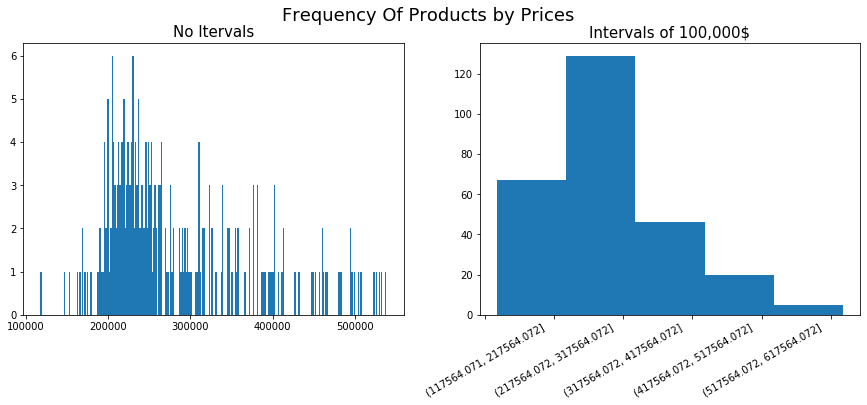

In [164]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
fig.suptitle('Frequency Of Products by Prices',fontsize=18)
ax1.hist(product['Price'], bins = product['Price'].count())
ax1.set_title('No Itervals',fontsize=15)
ax2.hist(product['Price'], bins=np.arange(product['Price'].min(), product['Price'].max()+100000, 100000))
ax2.set_title('Intervals of 100,000$',fontsize=15)
n = product['Price'].value_counts(bins=np.arange(product['Price'].min(), product['Price'].max()+100000, 100000),sort = False)
labels = [i for i in n.index]
ax2.set_xticklabels([labels[0],labels[0],labels[1],labels[2],labels[3],labels[4]],rotation = 30)
print(n)

covarince = 24147721.72581886
correlation = 0.9510873774316205


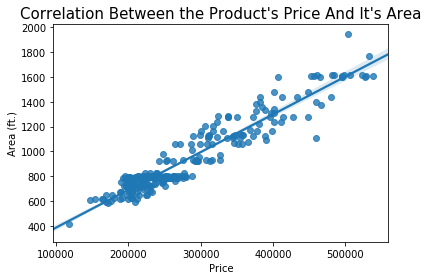

In [167]:
sns.regplot(product['Price'], product['Area (ft.)'])
plt.title("Correlation Between the Product's Price And It's Area",fontsize=15)
print('covarince = ' + str(product['Price'].cov(product['Area (ft.)'])))
print('correlation = ' + str(product['Price'].corr(product['Area (ft.)'])))